In [18]:
import numpy as np
import cv2
import os
from tqdm import tqdm
masks_path = '/home/yaniv.sheinfeld/data/je/Masks/train_5.4.7_201'

mask_values = []
for file in tqdm(os.listdir(masks_path)):
    mask = cv2.imread(os.path.join(masks_path, file),cv2.IMREAD_COLOR)
    if mask is not None:
        mask_values.extend(np.unique(mask).tolist())
        
print(np.unique(np.array(mask_values)))
    


100%|██████████| 1196/1196 [01:15<00:00, 15.81it/s]

[  0 128 255]


In [40]:
class_dict = {'background': [0,0,0], 
              'chip': [255,0,0],
              'crack': [0,255,0],
              'grinding': [0,0,255],
              'contamination': [128,128,128],
              'dent': [255,255,0],
              'sticky': [0,255,255]}

rgb_masks_folder = '/home/yaniv.sheinfeld/data/je/masks_all'
output_1_channel_masks_folder = '/home/yaniv.sheinfeld/data/je/masks_2/'

# Creating a lookup table
lookup_table = np.zeros((256, 256, 256), dtype=np.uint8)

for i, (key, value) in enumerate(class_dict.items()):
    lookup_table[value[0], value[1], value[2]] = i

# Going through each image
for im in tqdm(os.listdir(rgb_masks_folder)):
    rgb_mask = cv2.imread(os.path.join(rgb_masks_folder, im), cv2.IMREAD_COLOR)
    if rgb_mask is not None:
        # Converting RGB mask to grayscale using the lookup table
        mask = lookup_table[rgb_mask[:, :, 0], rgb_mask[:, :, 1], rgb_mask[:, :, 2]]
        cv2.imwrite(os.path.join(output_1_channel_masks_folder, im), mask)

100%|██████████| 11866/11866 [05:51<00:00, 33.79it/s]


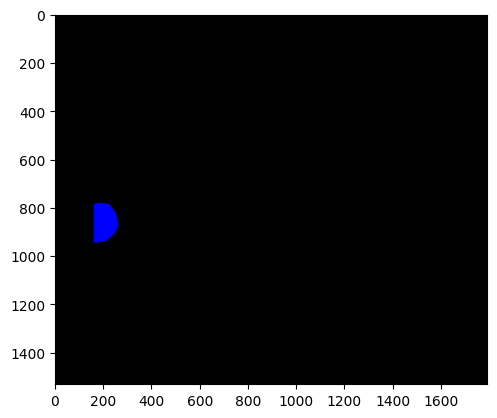

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
rgbmask = '/home/yaniv.sheinfeld/data/je/masks_all/101_7-44-39-833_ng.png'
graymask = '/home/yaniv.sheinfeld/data/je/masks_2/101_7-44-39-833_ng.png'
rgb_mask = cv2.imread(rgbmask, cv2.IMREAD_COLOR)
gray_mask = cv2.imread(graymask, cv2.IMREAD_GRAYSCALE)
plt.imshow(rgb_mask)


In [46]:

path = '/home/yaniv.sheinfeld/data/je/ann_dir/train/'

#if file in path ends with .jpg, change it to .png
for file in tqdm(os.listdir(path)):
    if file.endswith('.jpg'):
        os.rename(os.path.join(path, file), os.path.join(path, file[:-4]+'.png'))

100%|██████████| 13040/13040 [00:00<00:00, 548830.71it/s]
